## **Pie Chart: 2021 Average Commission Volume by Department**

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


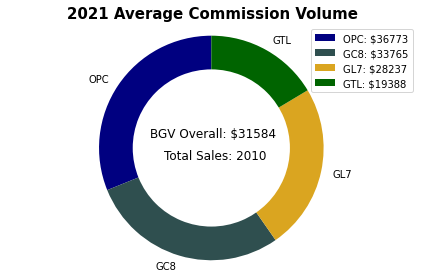

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive and read csv data
drive.mount('/content/drive')
BGV = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/BGVData/BookersLastFiveYears.csv')

# Only look at data from 2021
BGV['TourDate1'] = pd.to_datetime(BGV['TourDate1'])
BGV = BGV.loc[(BGV['TourDate1'] >= '2021-01-01') & (BGV['TourDate1'] <= '2021-12-31')]

# Define current OPC team
opc_team = BGV.loc[(BGV['PersonnelNameTitle'] == 'Tanner Milne: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Shianne Elliott: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Lara Crisp: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Cason Elliott: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Cari Heroux: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Beau Thomas: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Harry Canales: Tour Booker')]

# Define current GC8 Concierge team
gc8_concierge_team = BGV.loc[(BGV['PersonnelNameTitle'] == 'Benjamin Hubley: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Jessica Schumacher: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Kyle Brochu: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Melanie McQuade: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Sarah Tweed: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Teala Lengfeld: Tour Booker')]

# Define current GL7 Concierge team
gl7_concierge_team = BGV.loc[(BGV['PersonnelNameTitle'] == 'Cara Proudfoot: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Graham Courter: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Heinie Lund: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Matthew Steffen: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Russell Galloway: Tour Booker')]

# Define current GTL Concierge team
gtl_concierge_team = BGV.loc[(BGV['PersonnelNameTitle'] == 'Brock Cooper: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Dan Foley: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Jacob Friedman: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Kali Spicola: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Morgan Baker: Tour Booker') |
                   (BGV['PersonnelNameTitle'] == 'Robert Miller: Tour Booker')]

# Only look at contracts that are active and tours resulting in a sale. Calculate each department average and overall average
opc_team_sale = opc_team.loc[(opc_team['ContractStatus1'] == 'Active\r\nActive') & (opc_team['TourResult'] == 'Sale')]
opc_average = opc_team_sale['CommissionVolume'].mean()

gc8_concierge_team_sale = gc8_concierge_team.loc[(gc8_concierge_team['ContractStatus1'] == 'Active\r\nActive') & (gc8_concierge_team['TourResult'] == 'Sale')]
gc8_average = gc8_concierge_team_sale['CommissionVolume'].mean()

gl7_concierge_team_sale = gl7_concierge_team.loc[(gl7_concierge_team['ContractStatus1'] == 'Active\r\nActive') & (gl7_concierge_team['TourResult'] == 'Sale')]
gl7_average = gl7_concierge_team_sale['CommissionVolume'].mean()

gtl_concierge_team_sale = gtl_concierge_team.loc[(gtl_concierge_team['ContractStatus1'] == 'Active\r\nActive') & (gtl_concierge_team['TourResult'] == 'Sale')]
gtl_average = gtl_concierge_team_sale['CommissionVolume'].mean()

BGV_sale = BGV.loc[(BGV['ContractStatus1'] == 'Active\r\nActive') & (BGV['TourResult'] == 'Sale')]
BGV_average = BGV_sale['CommissionVolume'].mean()

# Define data coordinates and labels
labels = ['OPC', 'GC8', 'GL7', 'GTL']
sizes = [opc_average, gc8_average, gl7_average, gtl_average]

# Define colors and text size
colors = ['navy', 'darkslategrey','goldenrod', 'darkgreen']
textprops = {"fontsize":25}

# Plot pie chart and empty white middle pie chart
plt.pie(sizes, labels=labels, colors=colors,startangle=90)
plt.pie(1, radius=0.7,startangle=90,labeldistance=0.8,colors='white', textprops = textprops)

# Add title/legend and change layout
plt.title('2021 Average Commission Volume', fontsize=15, weight='bold')

plt.axis('equal')
plt.tight_layout()

plt.legend(['OPC: $'+str(int(opc_average)), 'GC8: $'+str(int(gc8_average)), 'GL7: $'+str(int(gl7_average)), 'GTL: $'+str(int(gtl_average))], loc='upper right')

# Add BGV Overall average and total sales text to the middle of pie chart
plt.text(-0.55 ,0.1, 'BGV Overall: $'+str(int(BGV_average)), fontsize=12)
plt.text(-0.42, -0.1, 'Total Sales: '+str(BGV_sale.shape[0]), fontsize=12)

plt.show()

## **Bar Graph: Number of Tours by Month Against Average**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text major ticklabel objects>)

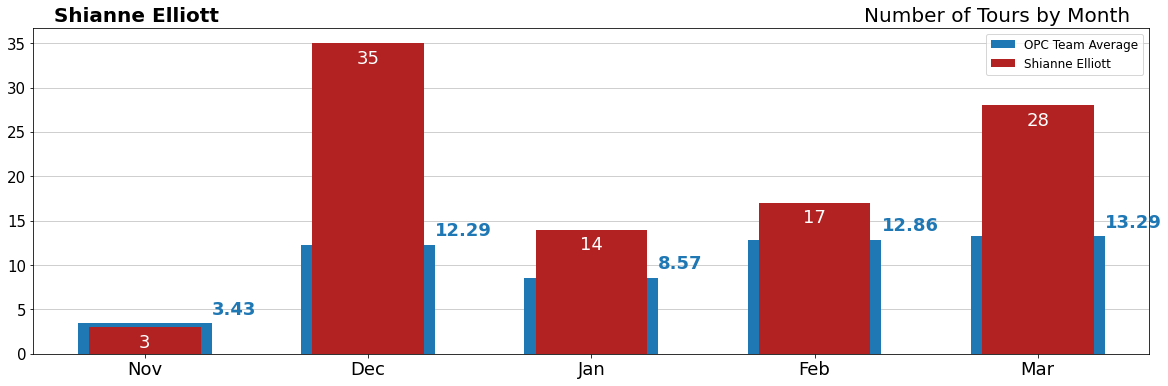

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Mount Google Drive and read csv data
drive.mount('/content/drive')
BGV = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/BGVData/BookersLastFiveYears.csv')

#Convert to datetime for chronology
BGV['TourDate1'] = pd.to_datetime(BGV['TourDate1'])

#Create a column 'TourMonth' with abbreviated month
BGV['TourMonth'] = BGV['TourDate1'].dt.month
BGV['TourMonth'] = BGV['TourMonth'].apply(lambda x: calendar.month_abbr[x])

# Only look at data for a particular person and only showed tours
name = 'Shianne Elliott'
individual = BGV.loc[BGV['PersonnelNameTitle'] == name+': Tour Booker']

individual_showed = individual.loc[individual['TourStatus2'] == 'Showed']

# Define OPC team
opc_team = BGV.loc[(BGV['PersonnelNameTitle'] == 'Tanner Milne: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Shianne Elliott: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Lara Crisp: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Cason Elliott: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Cari Heroux: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Beau Thomas: Tour Booker') | 
                   (BGV['PersonnelNameTitle'] == 'Harry Canales: Tour Booker')]

# Find individual's first tour date. Only look at OPC showed tours past individual's first tour date
individual_showed.set_index('TourDate1')
start_date = individual_showed['TourDate1'].iat[0]

opc_team_showed = opc_team.loc[opc_team['TourStatus2'] == 'Showed']
opc_team_showed_daterange = opc_team_showed.loc[opc_team_showed['TourDate1'] >= start_date]

# Average = overall opc tour count / number of opc members
average = opc_team_showed_daterange['TourMonth'].value_counts() / len(opc_team['PersonnelNameTitle'].unique())

# Order months should appear on graph
months = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']

# Graph average opc tours against invidiaul tours on the same graph
fig, ax = plt.subplots(figsize=(20,6))

average.reindex(months).plot(kind='bar', width=.6, zorder=3)
individual_showed['TourMonth'].value_counts().reindex(months).plot(kind='bar', color='firebrick', zorder=4).grid(axis='y', zorder=0, alpha=0.75)

# Use x and y for text referencing
x = average.reindex(months)
y = individual_showed['TourMonth'].value_counts().reindex(months)

# Plot text on graph showing average opc tours and invidual tours
for i in range(len(y)):
  plt.text(i, y[i]-2.25, str(y[i]), ha = 'center', fontsize=18, color='white', zorder=5)

for i in range(len(x)):
  plt.text(i+0.3, x[i]+1, str(round(x[i], 2)), ha = 'left', fontsize=18, color='#1f77b4', weight='bold')

# Add title/legend and format graph
plt.title("   "+name, fontsize=20, loc='left', weight='bold')
plt.title('Number of Tours by Month   ', fontsize=20, loc='right')

plt.legend(['OPC Team Average', name], prop={'size': 12})

plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=15)

## **Line Graph: 7 Day Rolling Average**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(1.0, 1.0, 'Tour Count Average from 2021-11-23 to 2022-03-30   ')

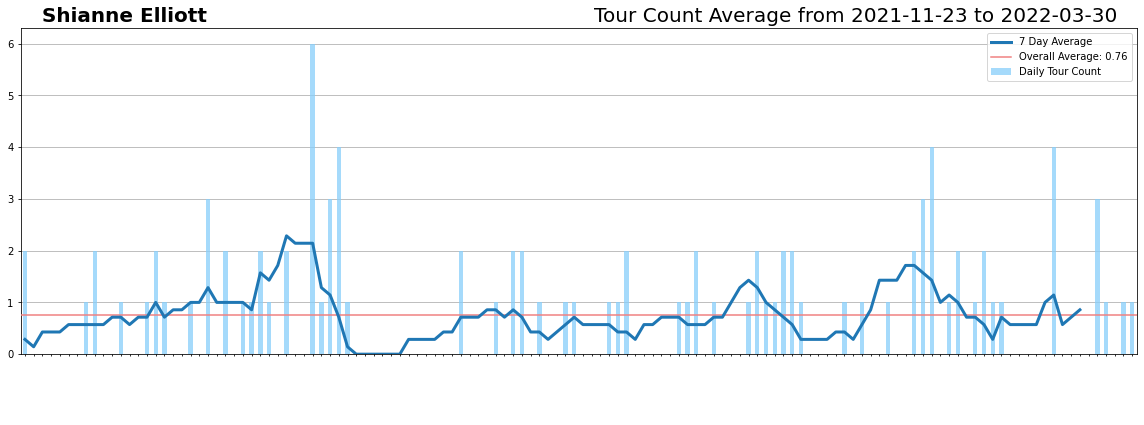

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Mount Google Drive and read csv data
drive.mount('/content/drive')
BGV = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/BGVData/BookersLastFiveYears.csv')

# Convert to datetime for chronology
BGV['TourDate1'] = pd.to_datetime(BGV['TourDate1'])

# Only look at data for a particular person
name = 'Shianne Elliott'
individual = BGV.loc[BGV['PersonnelNameTitle'] == name+': Tour Booker']

individual_showed = individual.loc[individual['TourStatus2'] == 'Showed']

# Select range of dates from first tour to last tour in data
individual_showed.set_index('TourDate1')
start_date = individual_showed['TourDate1'].iat[0]
end_date = individual_showed['TourDate1'].iat[-1]
daterange = pd.date_range(start = start_date, end = end_date, freq='d')

# Create new df from 'daterange'. Input tour count information to df and replace empty dates with zeros
individual_daterange = pd.DataFrame(index=daterange)
individual_daterange['Tour Count'] = individual_showed['TourDate1'].value_counts()

individual_daterange['Tour Count'] = individual_daterange['Tour Count'].fillna(0)

#Change the tour date to a string, to avoid autoformatting, so the two graphs can be plotted together
individual_daterange.index = individual_daterange.index.astype("string")

#Graph rolling 7 day average and daily tour count on the same graph
fig, ax = plt.subplots(figsize=(20,6))

individual_daterange.rolling(7).mean().shift(-6).plot(linewidth=3, color='#1f77b4', ax=ax, zorder=5)
individual_daterange.plot(kind='bar', color='lightskyblue', ax=ax, alpha=0.75, zorder=3).grid(axis='y', zorder=0)

#Calculate the average number of tours and plot
average = individual_daterange['Tour Count'].fillna(0).mean()
plt.axhline(y=average, color='lightcoral', zorder=4)

# Add title/legend and format graph
plt.legend(['7 Day Average', 'Overall Average: '+str(round(average,2)), 'Daily Tour Count'])
plt.tick_params(axis='x', labelcolor = 'white', size=2)
plt.title('   '+name, weight='bold', fontsize=20, loc='left')
plt.title('Tour Count Average from '+str(start_date.date())+' to '+str(end_date.date())+'   ', fontsize=20, loc='right')